In [2]:
# Importing necessary libraries

import lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the data

df = pd.read_csv('heart-data.csv')

In [4]:
df.head()

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371


In [5]:
print('The dataset consist of following number of patients: ', df.shape[0])

The dataset consist of following number of patients:  1000


Cox Proportional Hazard's Model ( CoxPH Model )

In [21]:
cph = lifelines.CoxPHFitter(penalizer= 0.01)

**Model-1**

Survival Time: fu_time 

Event: death 

Confounding Variables: ethnicgroup , gender

In [7]:
df['ethnicgroup'].value_counts()

1.0    889
3.0     34
2.0     17
9.0     17
Name: ethnicgroup, dtype: int64

In [8]:
df['gender'].value_counts()

1    548
2    452
Name: gender, dtype: int64

In [9]:
df_c = df.copy()

In [10]:
df_c = df[['ethnicgroup','gender','fu_time', 'death']]

In [14]:
df_c = pd.get_dummies(columns=['ethnicgroup','gender'], data= df_c, prefix_sep= '_')

In [13]:
df_c.head()

,fu_time,death,ethnicgroup_1.0,ethnicgroup_2.0,ethnicgroup_3.0,ethnicgroup_9.0,gender_1,gender_2
0,416,0,0,0,0,0,0,1
1,648,0,1,0,0,0,1,0
2,466,0,1,0,0,0,0,1
3,441,0,1,0,0,0,1,0
4,371,0,1,0,0,0,0,1


In [24]:
cph.fit(df_c , event_col= 'death' , duration_col= 'fu_time', show_progress= True , step_size= 0.01)

Iteration 1: norm_delta = 0.12604, step_size = 0.0100, log_lik = -2956.59206, newton_decrement = 4.81607, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.12557, step_size = 0.0100, log_lik = -2956.49621, newton_decrement = 4.74963, seconds_since_start = 0.1
Iteration 3: norm_delta = 0.12510, step_size = 0.0100, log_lik = -2956.40170, newton_decrement = 4.68403, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.12453, step_size = 0.0120, log_lik = -2956.28995, newton_decrement = 4.60635, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.12384, step_size = 0.0144, log_lik = -2956.15824, newton_decrement = 4.51464, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.12302, step_size = 0.0173, log_lik = -2956.00356, newton_decrement = 4.40670, seconds_since_start = 0.2
Iteration 7: norm_delta = 0.12203, step_size = 0.0207, log_lik = -2955.82269, newton_decrement = 4.28016, seconds_since_start = 0.2
Iteration 8: norm_delta = 0.12083, step_size = 0.0249, log_lik = -2955.61232

<lifelines.CoxPHFitter: fitted with 1000 total observations, 508 right-censored observations>

In [25]:
cph.print_summary()

In [51]:
# Following are the hazard ratios for different group:

cph.hazard_ratios_

ethnicgroup_1.0    1.035818
ethnicgroup_2.0    0.968217
ethnicgroup_3.0    0.331351
ethnicgroup_9.0    1.137068
gender_1           0.979607
gender_2           1.020818
Name: exp(coef), dtype: float64

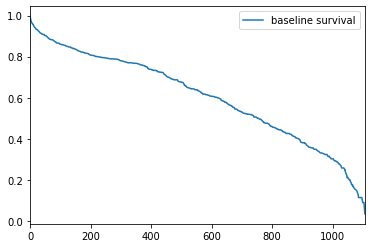

In [55]:
# Plotting the baseline survival function
cph.baseline_survival_.plot()

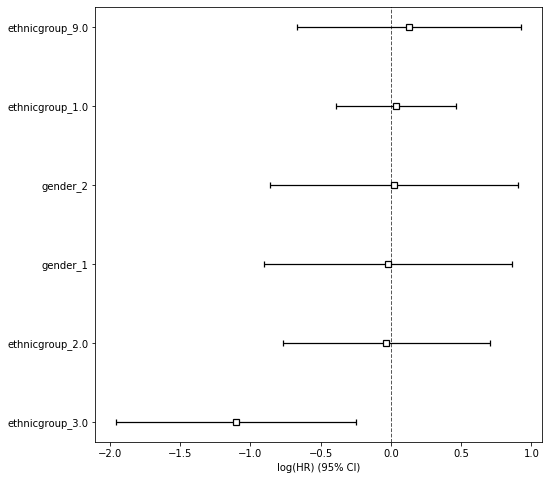

In [59]:
# Plotting the coefficients for CoxPH Model
plt.figure(figsize=(8,8))
cph.plot(hazard_ratios= False)

In [62]:
print('Log-Likelihood of the CoxPH Model is: ',cph.score(df_c, scoring_method= 'log_likelihood'))

Log-Likelihood of the CoxPH Model is:  -2.9500233738949526
